In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box


C:\Users\rowe\AppData\Local\Temp\ipykernel_2816\1232273867.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


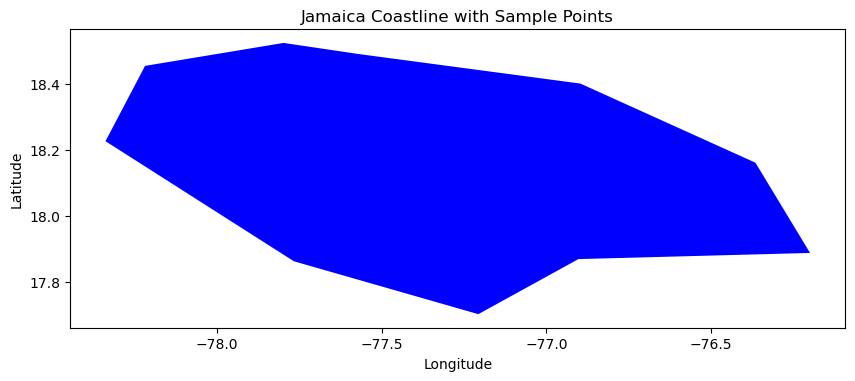

In [1]:
import geopandas as gpd

# Load the world dataset which includes country boundaries and coastlines
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the coastline for Jamaica
jamaica_coastline = world[world['name'] == 'Jamaica']['geometry'].unary_union

# Check if it's a MultiLineString, if so, convert to LineString
if jamaica_coastline.geom_type == 'MultiLineString':
    jamaica_coastline = jamaica_coastline[0]

# Save the LineString to a GeoDataFrame
jamaica_coastline_gdf = gpd.GeoDataFrame(geometry=[jamaica_coastline], crs=world.crs)

# Visualize or process the Jamaica coastline
# Plot both the coastline and the points
ax = jamaica_coastline_gdf.plot(color='blue', figsize=(10, 8))

ax.set_title('Jamaica Coastline with Sample Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

C:\Users\rowe\AppData\Local\Temp\ipykernel_16928\4010667350.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


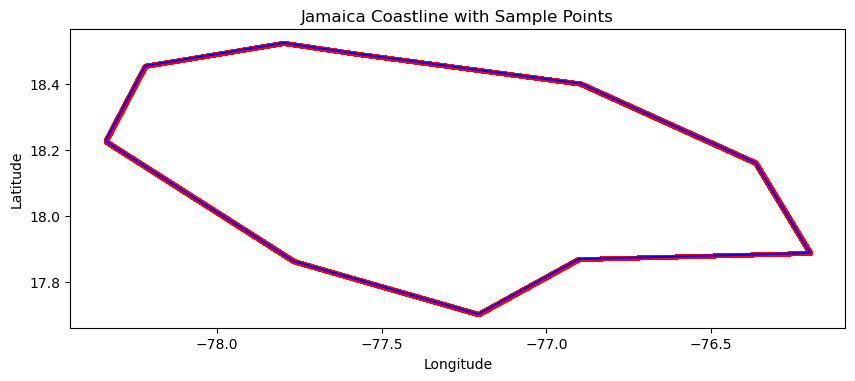

In [26]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load the GeoDataFrame containing the Jamaica coastline Polygon
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
jamaica_coastline_polygon = world[world['name'] == 'Jamaica']['geometry'].unary_union
if jamaica_coastline_polygon.geom_type == 'MultiPolygon':
    jamaica_coastline_polygon = jamaica_coastline_polygon[0]  # Assuming only one polygon
jamaica_coastline = jamaica_coastline_polygon.exterior  # Extract exterior boundary
jamaica_coastline_gdf = gpd.GeoDataFrame(geometry=[jamaica_coastline], crs=world.crs)

# Create sample points along the coastline
points = []
distance_along_line = 0
while distance_along_line < jamaica_coastline.length:
    point = jamaica_coastline.interpolate(distance_along_line)
    points.append(point)
    distance_along_line += 0.0001  # 100 meters spacing
points_gdf = gpd.GeoDataFrame(geometry=points, crs=world.crs)

# Plot both the coastline and the points
ax = jamaica_coastline_gdf.plot(color='blue', figsize=(10, 8))
points_gdf.plot(ax=ax, color='red', markersize=5)
ax.set_title('Jamaica Coastline with Sample Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')



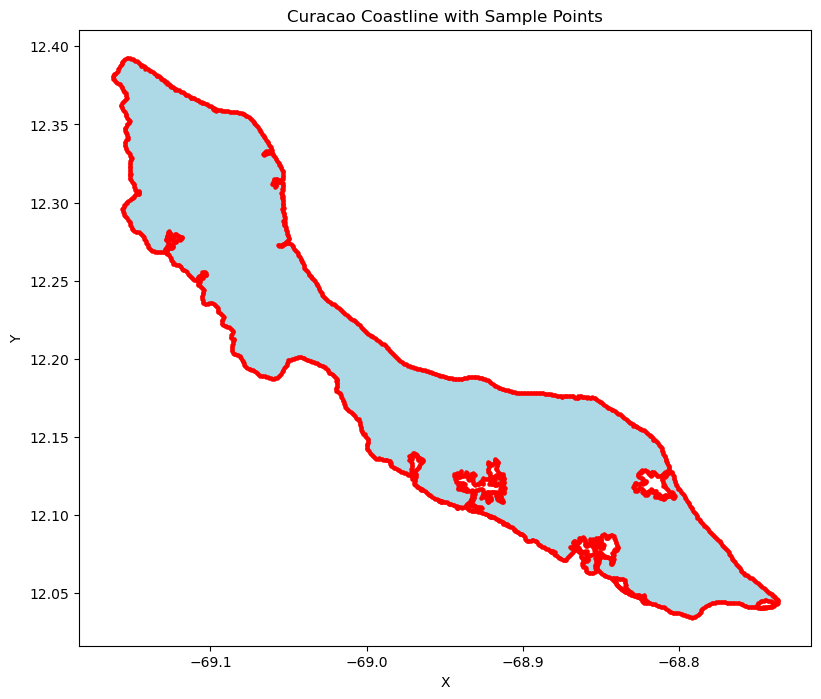

In [43]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, LineString

# Load the GeoDataFrame containing the polygon from the GeoPackage file
polygon_gdf = gpd.read_file(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Curacao_Polygon.gpkg')
polygon_gdf=polygon_gdf.to_crs(crs="EPSG:4326")

# Merge all geometries into a single MultiPolygon
multi_polygon = polygon_gdf['geometry'].unary_union

# Convert the MultiPolygon to a LineString representing the coastline
coastline_line = LineString(multi_polygon.boundary.coords)

# Create sample points along the coastline
points = []
distance_along_line = 0
while distance_along_line < coastline_line.length:
    point = coastline_line.interpolate(distance_along_line)
    points.append(point)
    distance_along_line += 0.001  # 100 meters spacing

# Create a GeoDataFrame for the points
points_gdf = gpd.GeoDataFrame(geometry=points, crs=polygon_gdf.crs)

# Plot both the coastline and the points
ax = polygon_gdf.plot(color='lightblue', figsize=(10, 8))
points_gdf.plot(ax=ax, color='red', markersize=5)
ax.set_title('Curacao Coastline with Sample Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')


In [44]:
points_gdf.index

RangeIndex(start=0, stop=2440, step=1)

In [45]:
print("Length of coastline LineString:", coastline_line.length)
print("Number of generated points:", len(points))
points_gdf["distance"]=points_gdf.index*100
points_gdf

Length of coastline LineString: 2.439015453209153
Number of generated points: 2440


,geometry,distance
0,POINT (-68.84834 12.06170),0
1,POINT (-68.84912 12.06225),100
2,POINT (-68.84990 12.06286),200
3,POINT (-68.85070 12.06346),300
4,POINT (-68.85136 12.06419),400
...,...,...
2435,POINT (-68.84468 12.06005),243500
2436,POINT (-68.84559 12.06048),243600
2437,POINT (-68.84652 12.06084),243700
2438,POINT (-68.84744 12.06124),243800


In [53]:
check_distance=0.01
# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in points_gdf['geometry']]})

In [54]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Nearshore_Slopes\Netherland_Antilles_NS.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,slope
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197),2.0,2.571829
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923),2.0,2.571829
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606),3.0,1.955613
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248),2.0,1.955613
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853),3.0,2.997358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682),2.0,2.392250
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745),2.0,3.694947
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766),2.0,3.694947
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760),2.0,2.723424


In [55]:
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,slope
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197),2.0,2.571829
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923),2.0,2.571829
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606),3.0,1.955613
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248),2.0,1.955613
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853),3.0,2.997358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682),2.0,2.392250
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745),2.0,3.694947
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766),2.0,3.694947
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760),2.0,2.723424


In [56]:
circle_center=points_gdf

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,'slope']=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,'slope']=nearest_point["slope"].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked:   0%|          | 2/2440 [00:00<03:19, 12.19it/s]

Transects checked: 100%|██████████| 2440/2440 [01:52<00:00, 21.61it/s]


,geometry,distance,sampled points,slope,pop_count
0,POINT (-68.84834 12.06170),0,4.0,4.010837,140.0
1,POINT (-68.84912 12.06225),100,4.0,4.010837,140.0
2,POINT (-68.84990 12.06286),200,4.0,4.010837,140.0
3,POINT (-68.85070 12.06346),300,4.0,4.010837,140.0
4,POINT (-68.85136 12.06419),400,4.0,0.003349,136.0
...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,4.010837,NaN
2436,POINT (-68.84559 12.06048),243600,4.0,4.010837,NaN
2437,POINT (-68.84652 12.06084),243700,4.0,4.010837,NaN
2438,POINT (-68.84744 12.06124),243800,4.0,4.010837,NaN


In [57]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\world_pop\Netherland_Antilles_world_pop.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,pop_count
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197),1.0,7.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923),0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606),0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248),0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682),2.0,11.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745),0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766),0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760),0.0,0.0


In [58]:


import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,'pop_count']=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,'pop_count']=nearest_point["pop_count"].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:51<00:00, 21.82it/s]


,geometry,distance,sampled points,slope,pop_count
0,POINT (-68.84834 12.06170),0,4.0,4.010837,140.0
1,POINT (-68.84912 12.06225),100,4.0,4.010837,140.0
2,POINT (-68.84990 12.06286),200,4.0,4.010837,140.0
3,POINT (-68.85070 12.06346),300,4.0,4.010837,140.0
4,POINT (-68.85136 12.06419),400,4.0,0.003349,136.0
...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,4.010837,74.0
2436,POINT (-68.84559 12.06048),243600,4.0,4.010837,74.0
2437,POINT (-68.84652 12.06084),243700,4.0,4.010837,140.0
2438,POINT (-68.84744 12.06124),243800,4.0,4.010837,140.0


In [69]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Elevation\DELTA_DEM\Netherland_Antilles_LECZ")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Pixel_AREA_m2,LECZ_AREA_m2,LECZ_mean_elev,LECZ_area_per_LECZ_mean_elev,TILE_NAME,Search_radius_deg,geometry
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,928.546836,1.865451e+06,9.038394,206391.821193,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.40103 12.30197)
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,927.910505,1.816849e+06,9.077979,200138.020907,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.40454 12.29923)
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,927.918553,1.932854e+06,9.133210,211629.241762,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.40765 12.29606)
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,927.927781,2.052576e+06,9.076377,226144.889084,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.41024 12.29248)
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,927.939024,2.073016e+06,8.951386,231585.999619,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.41218 12.28853)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,928.420803,1.677656e+06,2.395609,700304.651384,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.30046 12.16682)
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,928.414337,2.016516e+06,2.217481,909372.211143,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.30491 12.16745)
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,928.409509,2.026718e+06,2.124388,954024.610231,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.30938 12.16766)
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,928.407512,1.912519e+06,1.953067,979239.198034,DeltaDTM_v1_0_N12W069,0.009222,POINT (-68.31387 12.16760)


In [70]:

import warnings
column_name_="LECZ_area_per_LECZ_mean_elev"	

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
        #     circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        # circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:54<00:00, 21.22it/s]


,geometry,distance,sampled points,slope,pop_count,LECZ_area_per_LECZ_mean_elev
0,POINT (-68.84834 12.06170),0,4.0,0.235533,0.025367,289736.126650
1,POINT (-68.84912 12.06225),100,4.0,0.235533,0.025367,289736.126650
2,POINT (-68.84990 12.06286),200,4.0,0.235533,0.025367,289736.126650
3,POINT (-68.85070 12.06346),300,4.0,0.235533,0.025367,289736.126650
4,POINT (-68.85136 12.06419),400,4.0,0.000000,0.024642,356249.967335
...,...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,0.235533,0.013408,244939.371945
2436,POINT (-68.84559 12.06048),243600,4.0,0.235533,0.013408,244939.371945
2437,POINT (-68.84652 12.06084),243700,4.0,0.235533,0.025367,289736.126650
2438,POINT (-68.84744 12.06124),243800,4.0,0.235533,0.025367,289736.126650


In [76]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Built_up_perc-LandUse\Netherland_Antilles_built_up.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,built_up_perc,geometry
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,0.876549,POINT (-68.40103 12.30197)
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,0.954057,POINT (-68.40454 12.29923)
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,0.712364,POINT (-68.40765 12.29606)
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,0.802819,POINT (-68.41024 12.29248)
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,0.724815,POINT (-68.41218 12.28853)
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,1.034188,POINT (-68.30046 12.16682)
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,0.000000,POINT (-68.30491 12.16745)
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,0.000000,POINT (-68.30938 12.16766)
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,0.000000,POINT (-68.31387 12.16760)


In [77]:

import warnings
column_name_="built_up_perc"	

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
        #     circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        # circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:56<00:00, 20.88it/s]


,geometry,distance,sampled points,slope,pop_count,LECZ_area_per_LECZ_mean_elev,built_up_perc
0,POINT (-68.84834 12.06170),0,4.0,0.235533,0.025367,0.266928,17.732094
1,POINT (-68.84912 12.06225),100,4.0,0.235533,0.025367,0.266928,17.732094
2,POINT (-68.84990 12.06286),200,4.0,0.235533,0.025367,0.266928,17.732094
3,POINT (-68.85070 12.06346),300,4.0,0.235533,0.025367,0.266928,17.732094
4,POINT (-68.85136 12.06419),400,4.0,0.000000,0.024642,0.333635,17.506038
...,...,...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,0.235533,0.013408,0.222002,15.372980
2436,POINT (-68.84559 12.06048),243600,4.0,0.235533,0.013408,0.222002,15.372980
2437,POINT (-68.84652 12.06084),243700,4.0,0.235533,0.025367,0.266928,17.732094
2438,POINT (-68.84744 12.06124),243800,4.0,0.235533,0.025367,0.266928,17.732094


In [144]:

# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# # Perform Min-Max scaling
# scaler = MinMaxScaler()
# circle_center[columns_to_scale] = scaler.fit_transform(circle_center[columns_to_scale])

# # Plotting the line graph using Seaborn
# sns.lineplot(data=circle_center, x='distance', y=circle_center.columns[3],label=circle_center.columns[3], palette='Blues', marker=None,markeredgewidth=0)
# sns.lineplot(data=circle_center, x='distance', y=circle_center.columns[4],label=circle_center.columns[4], palette='Oranges', marker=None,markeredgewidth=0)
# sns.lineplot(data=circle_center, x='distance', y=circle_center.columns[5],label=circle_center.columns[5], palette='reds', marker=None,markeredgewidth=0)
# sns.lineplot(data=circle_center, x='distance', y=circle_center.columns[6],label=circle_center.columns[6], palette='reds', marker=None,markeredgewidth=0)

# plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
# plt.xlabel('Coastline Distance')
# plt.ylabel('Indicator Variation')
# plt.grid(True)
# plt.show()

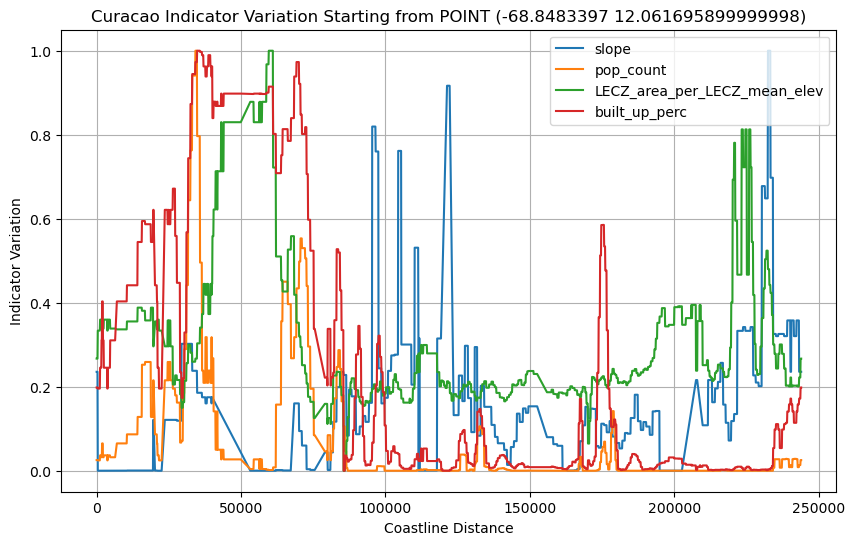

In [91]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(10, 6))  

columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# Perform Min-Max scaling
scaler = MinMaxScaler()
circle_center[columns_to_scale] = scaler.fit_transform(circle_center[columns_to_scale])

# Plotting the line graph using Seaborn
for column in circle_center.columns[3:]:
    sns.lineplot(data=circle_center, x='distance', y=column, label=column)

plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
plt.xlabel('Coastline Distance')
plt.ylabel('Indicator Variation')
plt.grid(True)
plt.show()

In [110]:
points_gdf["geometry"][0].y

12.061695899999998

In [143]:
fig2 = go.Figure(go.Scattermapbox(
    lat=points_gdf["geometry"].y,
    lon=points_gdf["geometry"].x,
    mode='markers',
    marker=dict(
        size=15,
        color=points_gdf["distance"],  # Set color to red

        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            # title=f'Curacao chainage starting counterclockwise from lon= {circle_center["geometry"][0].x:.2f} and lat= {circle_center["geometry"][0].y:.2f}'  # Set color bar title?
            title = (
                        f'Curacao along-shoreline chainage <br> (meters)'
                    )            
        )
    ),
    hoverinfo='text',
    hovertext=points_gdf["distance"],
    showlegend=False
))

# Update layout properties
fig2.update_layout(
    title = f"Curacao Transect Chainage at 100m spacing starting counterclockwise from:<br> Point lon={circle_center['geometry'][0].x:.2f}° and lat={circle_center['geometry'][0].y:.2f}°",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=9,
        center=dict(lat=12.18625, lon=-68.95)
    ),		

    margin=dict(l=0, r=50, b=0, t=50),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
),
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

# Show the plot
fig2.show()

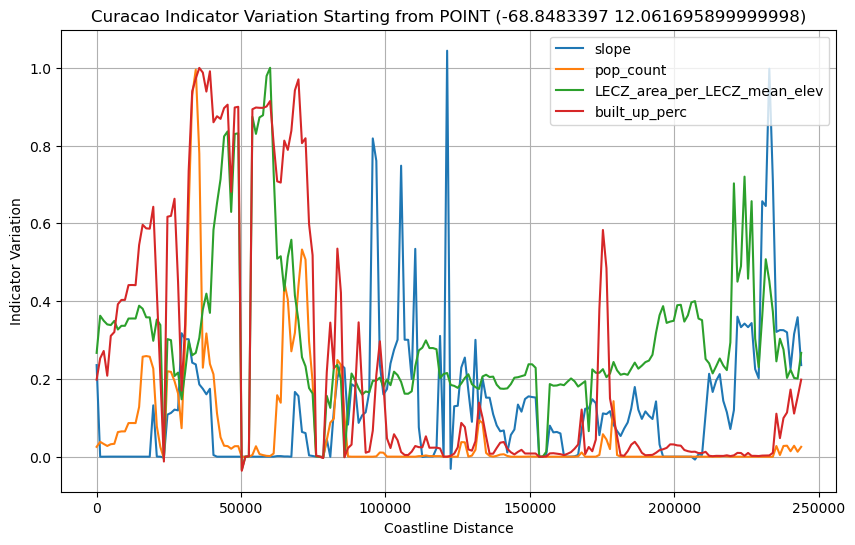

In [97]:
# Smooth into spline

# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from scipy.interpolate import make_interp_spline
# import numpy as np

# plt.figure(figsize=(10, 6))  

# columns_to_scale = circle_center.columns[3:] # Starting from the third column to the end

# # Perform Min-Max scaling
# scaler = MinMaxScaler()
# circle_center[columns_to_scale] = scaler.fit_transform(circle_center[columns_to_scale])

# # Define x as 200 equally spaced values between the min and max of original x
# x = circle_center['distance'].values
# xnew = np.linspace(x.min(), x.max(), 200)

# for column in circle_center.columns[3:]:
#     # Check for NaNs and Infs
#     if np.isnan(circle_center[column].values).any() or np.isinf(circle_center[column].values).any():
#         # Handle NaNs and Infs (e.g., replace with 0)
#         circle_center[column].fillna(0, inplace=True)
#         circle_center[column].replace([np.inf, -np.inf], 0, inplace=True)
    
#     # Define spline
#     spl = make_interp_spline(x, circle_center[column].values, k=11)
#     y_smooth = spl(xnew)
    
#     # Plotting the smoothed line graph using Matplotlib
#     plt.plot(xnew, y_smooth, label=column)

# plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
# plt.xlabel('Coastline Distance')
# plt.ylabel('Indicator Variation')
# plt.grid(True)
# plt.legend()
# plt.show()


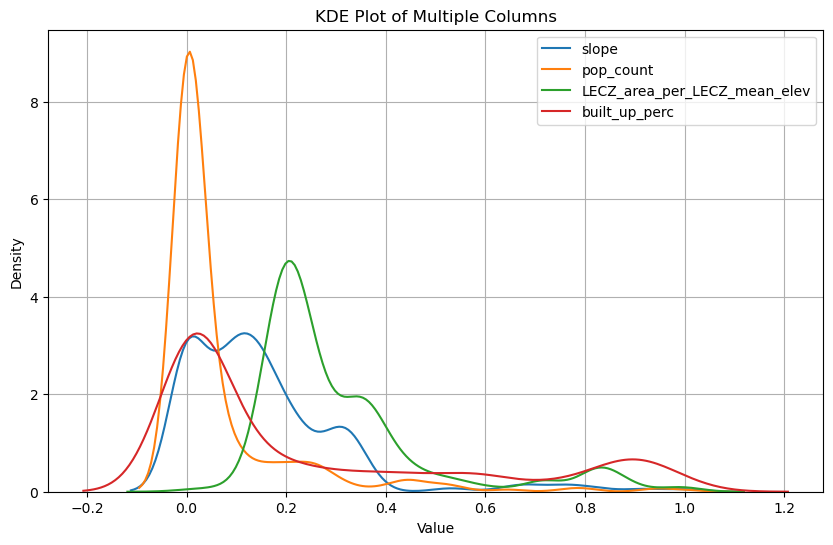

In [83]:
# Kernel density plot

import seaborn as sns
import matplotlib.pyplot as plt

# Smooth the data using KDE plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed


columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# Perform Min-Max scaling
scaler = MinMaxScaler()
circle_center[columns_to_scale] = scaler.fit_transform(circle_center[columns_to_scale])


for column in circle_center.columns[3:]:
    sns.kdeplot(data=circle_center, x=column, label=column)

plt.title('KDE Plot of Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

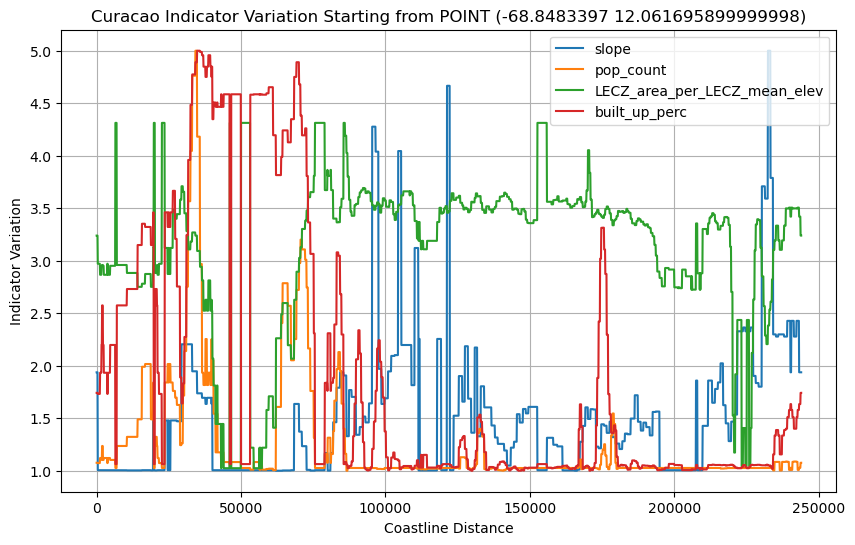

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

plt.figure(figsize=(10, 6))

columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# Perform KMeans clustering-based scaling
for column in columns_to_scale:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(circle_center[[column]])
    
    # Transform values based on cluster centroids
    scaled_values = kmeans.transform(circle_center[[column]])
    scaled_values = 1 + (scaled_values - scaled_values.min()) / (scaled_values.max() - scaled_values.min()) * 4
    
    circle_center[column] = scaled_values

# Plotting the line graph using Seaborn
for column in circle_center.columns[3:]:
    sns.lineplot(data=circle_center, x='distance', y=column, label=column)

plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
plt.xlabel('Coastline Distance')
plt.ylabel('Indicator Variation')
plt.grid(True)
plt.show()


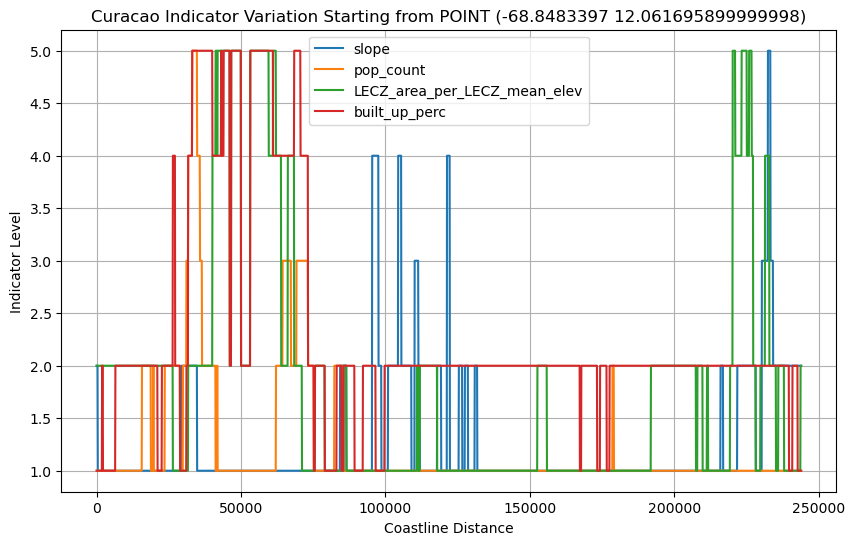

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

plt.figure(figsize=(10, 6))

columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# Perform KMeans clustering-based scaling
for column in columns_to_scale:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(circle_center[[column]])
    
    # Transform values based on cluster centroids
    scaled_values = kmeans.transform(circle_center[[column]])
    scaled_values = 1 + (scaled_values - scaled_values.min()) / (scaled_values.max() - scaled_values.min()) * 4
    
    # Round scaled values to the nearest integer
    scaled_values = np.round(scaled_values).astype(int)
    
    circle_center[column] = scaled_values

# Plotting the line graph using Seaborn
for column in circle_center.columns[3:]:
    sns.lineplot(data=circle_center, x='distance', y=column, label=column)

plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
plt.xlabel('Coastline Distance')
plt.ylabel('Indicator Level')
plt.grid(True)
plt.show()


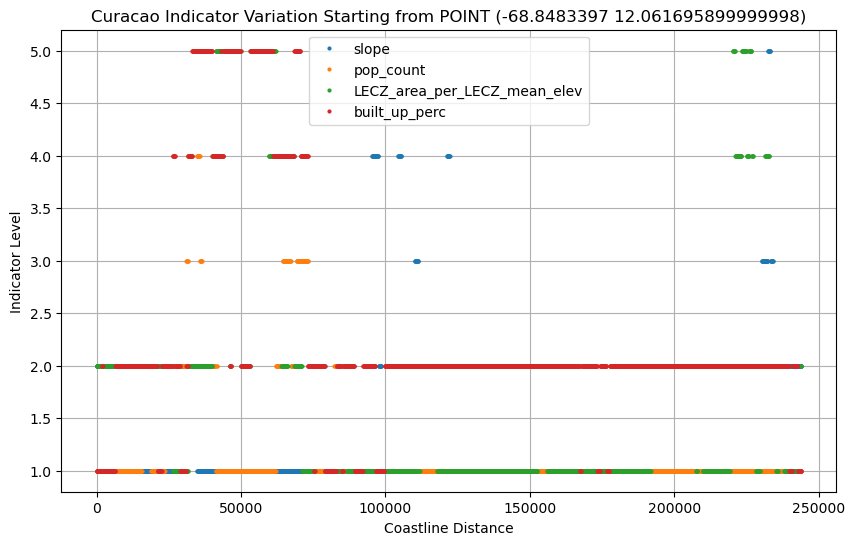

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

plt.figure(figsize=(10, 6))

columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# Perform KMeans clustering-based scaling
for column in columns_to_scale:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(circle_center[[column]])
    
    # Transform values based on cluster centroids
    scaled_values = kmeans.transform(circle_center[[column]])
    scaled_values = 1 + (scaled_values - scaled_values.min()) / (scaled_values.max() - scaled_values.min()) * 4
    
    # Round scaled values to the nearest integer
    scaled_values = np.round(scaled_values).astype(int)
    
    circle_center[column] = scaled_values

# Plotting the line graph using Seaborn
for column in circle_center.columns[3:]:
    sns.lineplot(data=circle_center, x='distance', y=column, label=column, marker="o",linewidth=0, markeredgewidth=0,markersize=3)

plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
plt.xlabel('Coastline Distance')
plt.ylabel('Indicator Level')
plt.grid(True)
plt.show()
